Time Series analysis 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Creating sample data 

In [2]:
date_range = pd.date_range(start='1/1/2020', periods=200, freq='D')

In [3]:
np.random.seed(42)
data = np.random.randn(200).cumsum() + 50

In [4]:
df = pd.DataFrame(data, index=date_range, columns=['value'])

In [5]:
df.head()

,value
2020-01-01,50.496714
2020-01-02,50.358450
2020-01-03,51.006138
2020-01-04,52.529168
2020-01-05,52.295015


Visualizing Data

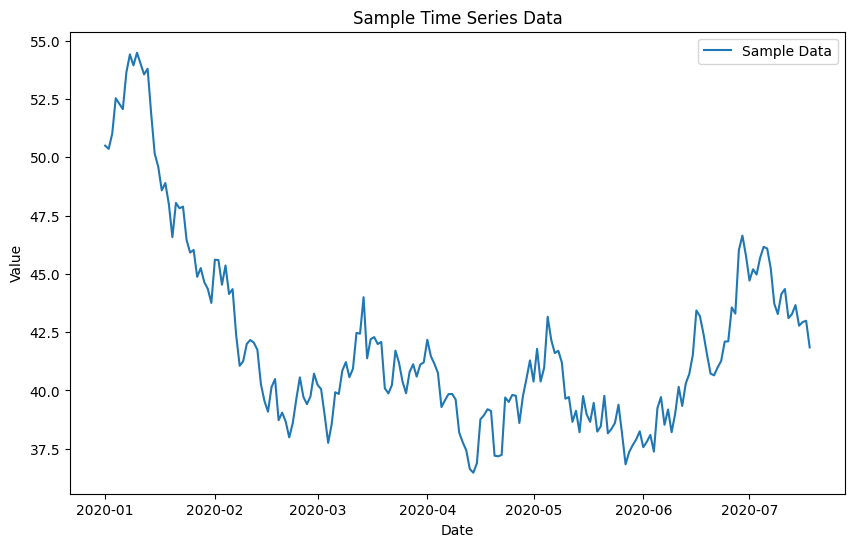

In [6]:
plt.figure(figsize=(10, 6))
plt.plot(df, label='Sample Data')
plt.title('Sample Time Series Data')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()


Decompose time series data

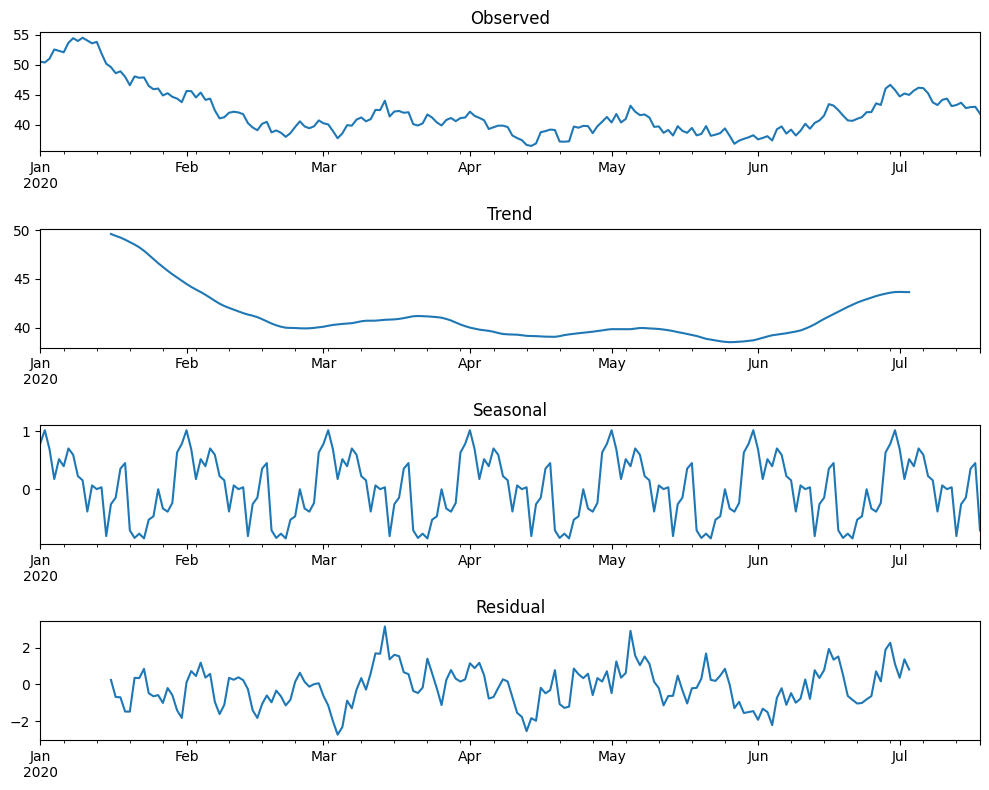

In [7]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Decompose the time series
decomposition = seasonal_decompose(df['value'], model='additive', period=30)

# Plot the decomposed components
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(10, 8))
decomposition.observed.plot(ax=ax1, title='Observed')
decomposition.trend.plot(ax=ax2, title='Trend')
decomposition.seasonal.plot(ax=ax3, title='Seasonal')
decomposition.resid.plot(ax=ax4, title='Residual')
plt.tight_layout()
plt.show()


Appy ARIMA Model

In [8]:
# import the model 
from statsmodels.tsa.arima.model import ARIMA

In [9]:
# train and test data 
train_size = int(len(df) * 0.8)
train, test = df.iloc[:train_size], df.iloc[train_size:]

In [10]:
# train the model
model = ARIMA(train, order=(5, 1, 0))
model_fit = model.fit()


In [11]:
# prediction by trained model
predictions = model_fit.forecast(steps=len(test))

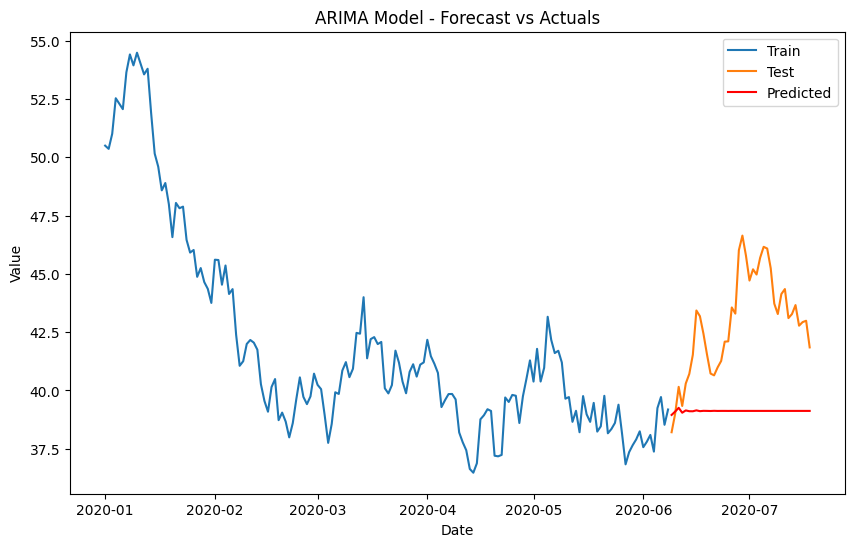

In [12]:
# visualize the predictions
plt.figure(figsize=(10, 6))
plt.plot(train, label='Train')
plt.plot(test, label='Test')
plt.plot(test.index, predictions, label='Predicted', color='red')
plt.title('ARIMA Model - Forecast vs Actuals')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()